In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',None)

In [2]:
# import ipl ball by ball data

In [3]:
df= pd.read_csv('IPL_ball_by_ball_new.csv')

In [4]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.innings.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
df = df[(df.innings==1) | (df.innings==2)]

In [7]:
df.innings.unique()

array([1, 2], dtype=int64)

In [8]:
# What are the nos. when ABD plays Bumrah?
# Step 1 Filter the name
# Step 2 Use these name and assigne them as striker and bowler
# Step 3 Get the required columns

In [9]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [10]:
df[df.bowling_team=='Mumbai Indians']["bowler"].unique()

array(['A Nehra', 'SM Pollock', 'DS Kulkarni', 'ST Jayasuriya',
       'Harbhajan Singh', 'AM Nayar', 'DJ Bravo', 'VS Yeligati',
       'MA Khote', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely', 'RR Raje',
       'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan', 'SR Tendulkar',
       'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane', 'RA Shaikh',
       'R McLaren', 'AG Murtaza', 'R Sathish', 'KA Pollard', 'AN Ahmed',
       'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma', 'TL Suman',
       'A Symonds', 'RW Price', 'PP Ojha', 'RP Singh', 'CJ McKay',
       'NLTC Perera', 'RJ Peterson', 'R Shukla', 'MG Johnson',
       'JJ Bumrah', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'K Santokie', 'S Gopal', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma',
       'Mustafizur Rahman', 'M Markande', 'PJ Sangwan', 'BCJ C

In [11]:
# Player 1 = 'JJ Bumrah'

In [12]:
df[df.batting_team=='Royal Challengers Bangalore']["striker"].unique()

array(['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis', 'CL White',
       'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar', 'Z Khan',
       'SB Joshi', 'S Chanderpaul', 'LRPL Taylor', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'JD Ryder',
       'KP Pietersen', 'RV Uthappa', 'R Bishnoi', 'KV Sharma',
       'Pankaj Singh', 'RE van der Merwe', 'MK Pandey', 'KP Appanna',
       'D du Preez', 'EJG Morgan', 'A Mithun', 'S Sriram', 'MA Agarwal',
       'TM Dilshan', 'AB de Villiers', 'SS Tiwary', 'AUK Pathan',
       'CA Pujara', 'JJ van der Wath', 'R Ninan', 'DL Vettori',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'DT Christian', 'KK Nair', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'P

In [13]:
# player 2 = 'AB de Villiers'

In [14]:
new_df=df[(df.striker== 'AB de Villiers') & (df.bowler=='JJ Bumrah')]

In [15]:
new_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95674,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95675,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95677,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95704,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95705,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Nos of runs scored?
# Nos of bowl faced
# Nos of times dismissed

In [17]:
# runs scored 
sum(new_df.runs_off_bat)

125

In [18]:
# Nos of balls faced
len(new_df)

86

In [19]:
# Player dismissed
len(new_df[new_df.player_dismissed== 'AB de Villiers'])

3

In [20]:
# strike rate
100*sum(new_df.runs_off_bat)/len(new_df)

145.34883720930233

In [21]:
# Comparing all batsmen Bumrah bowled.
bumrah_df= df[df.bowler=="JJ Bumrah"]

In [22]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76636,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.1,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76637,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.2,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76638,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.3,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76639,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.4,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76640,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,4.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,V Kohli,NaN,NaN


In [23]:
#runs scored by this battsmen
bdf1= pd.DataFrame (bumrah_df.groupby('striker') ['runs_off_bat'].sum()).reset_index()

In [24]:
bdf1.head()

,striker,runs_off_bat
0,A Badoni,3
1,A Mishra,1
2,AB de Villiers,125
3,AD Nath,4
4,AD Russell,56


In [25]:
bdf2 = pd.DataFrame (bumrah_df.groupby('striker') ['ball'].count()).reset_index()

In [26]:
bdf2.head()

,striker,ball
0,A Badoni,5
1,A Mishra,5
2,AB de Villiers,86
3,AD Nath,4
4,AD Russell,45


In [27]:
bdf3= bdf1.merge(bdf2,on = 'striker', how = 'left')

In [28]:
bdf3.head()

,striker,runs_off_bat,ball
0,A Badoni,3,5
1,A Mishra,1,5
2,AB de Villiers,125,86
3,AD Nath,4,4
4,AD Russell,56,45


In [29]:
bdf3['strike_rate']= 100*bdf3['runs_off_bat']/bdf3['ball']

In [30]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,3,5,60.000000
1,A Mishra,1,5,20.000000
2,AB de Villiers,125,86,145.348837
3,AD Nath,4,4,100.000000
4,AD Russell,56,45,124.444444


In [31]:
#minimum criteria 30 balls
bdf3=bdf3[(bdf3.ball>=30)]

In [32]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
2,AB de Villiers,125,86,145.348837
4,AD Russell,56,45,124.444444
9,AM Rahane,49,41,119.512195
10,AR Patel,40,42,95.238095
13,AT Rayudu,60,44,136.363636


In [33]:
# Comparing all bowlers faced by ABD.
Abd_df= df[df.striker=="AB de Villiers"]

In [34]:
Abd_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
4707,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,11.3,Delhi Daredevils,Chennai Super Kings,AB de Villiers,G Gambhir,Joginder Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4708,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,11.4,Delhi Daredevils,Chennai Super Kings,AB de Villiers,G Gambhir,Joginder Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4710,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,11.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,G Gambhir,Joginder Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4711,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,12.1,Delhi Daredevils,Chennai Super Kings,AB de Villiers,G Gambhir,M Muralitharan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4713,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,12.3,Delhi Daredevils,Chennai Super Kings,AB de Villiers,G Gambhir,M Muralitharan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#runs scored by this batsmen
adf1= pd.DataFrame (Abd_df.groupby('bowler') ['runs_off_bat'].sum()).reset_index()

In [36]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [37]:
# balls faced by ABD
adf2= pd.DataFrame (Abd_df.groupby('bowler') ['ball'].count()).reset_index()

In [38]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [39]:
adf3= adf1.merge(adf2,on = 'bowler', how = 'left')

In [40]:
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [41]:
adf3['strike_rate']= 100*adf3['runs_off_bat']/adf3['ball']

In [42]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [43]:
# minimum criteria 30 balls
adf3=adf3[(adf3.ball>=30)]

In [44]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,39,223.076923
20,AR Patel,71,70,101.428571
32,B Kumar,68,43,158.139535


In [45]:
#bdf3 and adf3 are two new data frames created

In [46]:
bdf3.reset_index(inplace=True, drop=True)
adf3.reset_index(inplace=True, drop=True)

In [47]:
bdf3

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,56,45,124.444444
2,AM Rahane,49,41,119.512195
3,AR Patel,40,42,95.238095
4,AT Rayudu,60,44,136.363636
5,CH Gayle,37,53,69.811321
6,DA Warner,54,47,114.893617
7,F du Plessis,61,38,160.526316
8,G Gambhir,29,33,87.878788
9,GJ Maxwell,44,39,112.820513


In [48]:
bdf3.sort_values('strike_rate' , ascending=False)

,striker,runs_off_bat,ball,strike_rate
11,JP Duminy,70,33,212.121212
15,MK Pandey,69,39,176.923077
12,KD Karthik,61,35,174.285714
7,F du Plessis,61,38,160.526316
26,V Kohli,140,93,150.537634
24,SS Iyer,59,40,147.500000
0,AB de Villiers,125,86,145.348837
4,AT Rayudu,60,44,136.363636
21,SK Raina,50,39,128.205128
1,AD Russell,56,45,124.444444


In [49]:
adf3.sort_values('strike_rate' , ascending=False)

,bowler,runs_off_bat,ball,strike_rate
8,HH Pandya,88,39,225.641026
2,AD Russell,87,39,223.076923
15,JP Faulkner,62,30,206.666667
5,CH Morris,71,35,202.857143
19,Mohammed Shami,59,30,196.666667
30,SL Malinga,124,64,193.750000
33,Sandeep Sharma,107,57,187.719298
28,SB Jakati,55,30,183.333333
17,M Ashwin,55,31,177.419355
22,PV Tambe,54,32,168.750000


In [50]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,56,45,124.444444
2,AM Rahane,49,41,119.512195
3,AR Patel,40,42,95.238095
4,AT Rayudu,60,44,136.363636


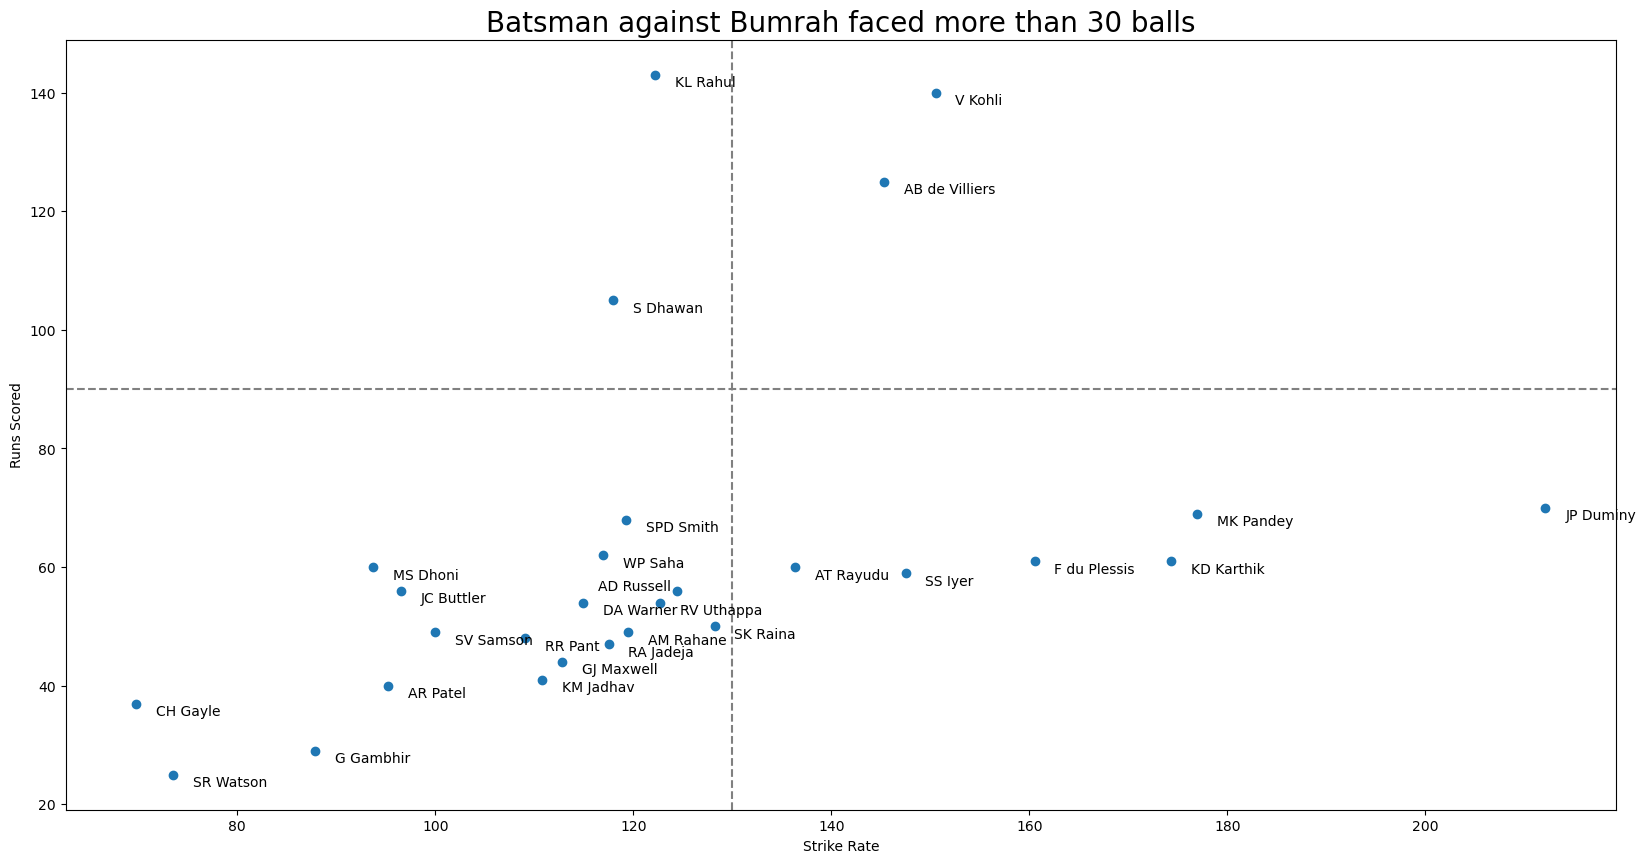

In [51]:
plt.figure(figsize= (20,10))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
for i in range (len(bdf3)):
    #plt.text(x ,y and textvalue)
    if bdf3 ['striker'][i]=='AD Russell':
        plt.text(bdf3['strike_rate'][i]-8, bdf3['runs_off_bat'][i], bdf3['striker'][i])
    else:
        plt.text(bdf3['strike_rate'][i]+2, bdf3['runs_off_bat'][i]-2, bdf3['striker'][i])
plt.axvline(130, ls='--', color='grey')
plt.axhline(90, ls='--', color='grey')
plt.title('Batsman against Bumrah faced more than 30 balls', fontsize=20)
plt.xlabel('Strike Rate'), plt.ylabel('Runs Scored')
plt.show()

In [52]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Kumble,39,41,95.121951
1,A Mishra,40,37,108.108108
2,AD Russell,87,39,223.076923
3,AR Patel,71,70,101.428571
4,B Kumar,68,43,158.139535


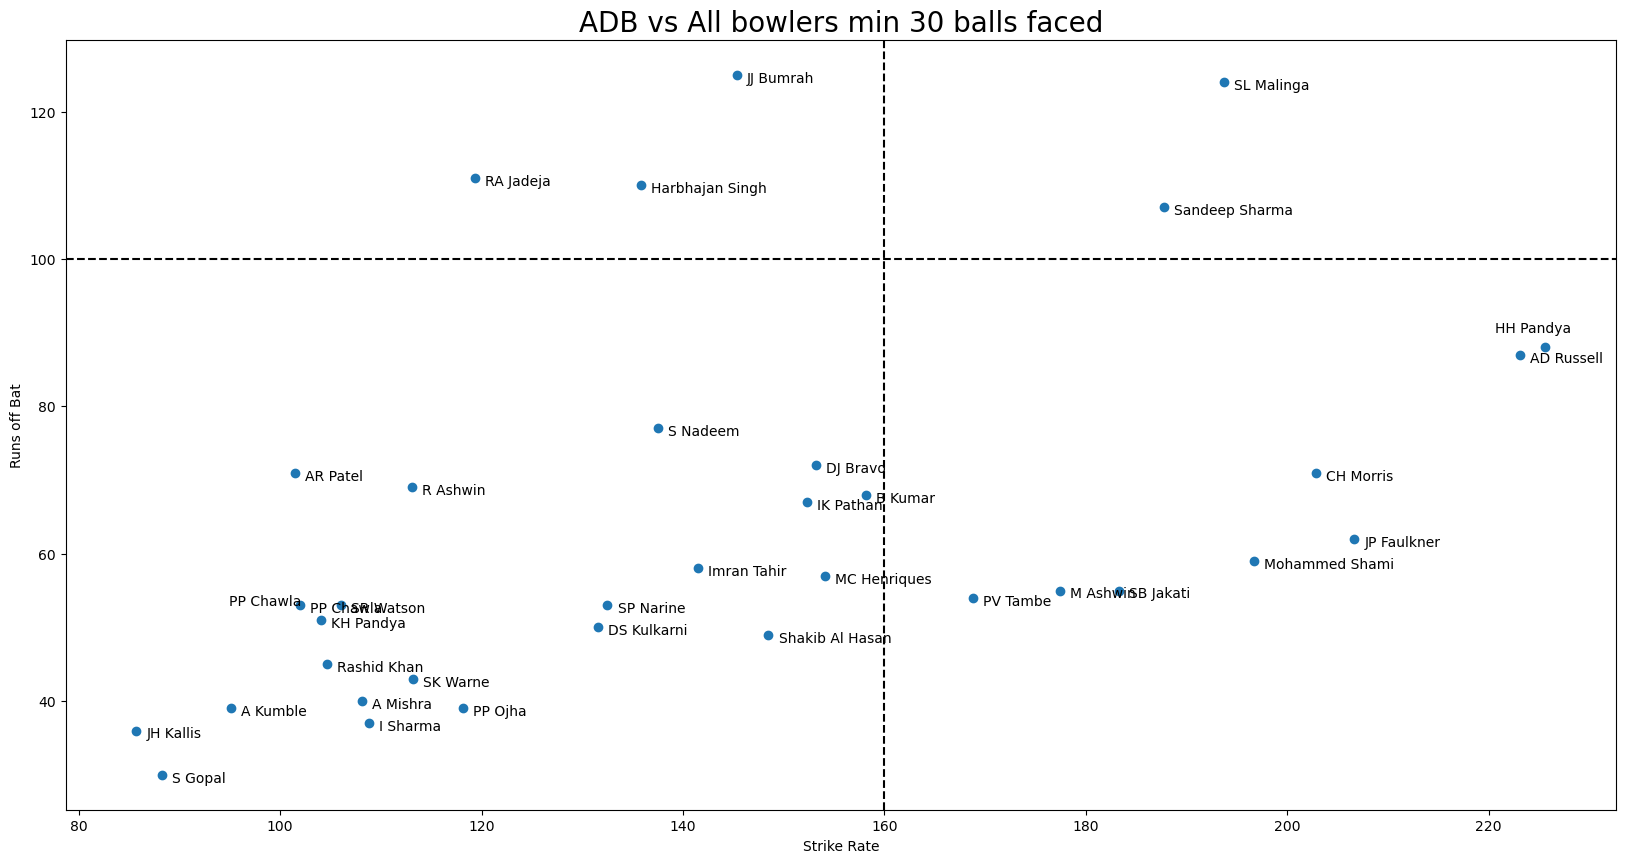

In [160]:
plt.figure(figsize=(20,10))
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)
plt.title('ADB vs All bowlers min 30 balls faced', fontsize=20)
for i in range(len(adf3)):
    if adf3['bowler'][i]== 'PP Chawla':
        plt.text(adf3['strike_rate'][i]-7,adf3['runs_off_bat'][i],adf3['bowler'][i])
    if adf3['bowler'][i]=='HH Pandya':
        plt.text(adf3['strike_rate'][i]-5,adf3['runs_off_bat'][i]+2,adf3['bowler'][i])
    else:
        plt.text(adf3['strike_rate'][i]+1,adf3['runs_off_bat'][i]-1,adf3['bowler'][i])
plt.axvline(160, ls='--', color='black')
plt.axhline(100,ls='--',color='black')
plt.xlabel('Strike Rate')
plt.ylabel('Runs off Bat')
plt.show()